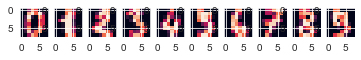

In [2]:
import numpy as np
import tqdm
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
import pandas as pd
from sklearn import metrics
import seaborn as sns
digits = load_digits()
# Affichage des 10 premières images
import matplotlib.pyplot as plt
fig = plt.figure()
for i, digit in enumerate(digits.images[:10]):
    fig.add_subplot(1,10,i+1)
    plt.imshow(digit)
plt.show()

In [3]:
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [4]:
df = pd.DataFrame(digits.data, columns=digits.feature_names)
df['target'] = digits.target
df.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


1- Découpez vos données en un ensemble d’apprentissage 90% et un ensemble de test
de 10%

In [5]:
X, y = digits.data, digits.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10)

Pour comparer, construisons maintenant un classifieur bagging sur nos données, toujours basé sur les DecisionTreeClassifier :

In [6]:
clf = BaggingClassifier(DecisionTreeClassifier(), max_samples=0.5,
                        max_features=0.5, n_estimators=200)

2- Construire la variance de la valeur accuracy sur 100 tirages pour la séparation
apprentissage/test. Que pouvons-nous conclure ?

In [7]:
var = []
for i in tqdm.tqdm(range(100)):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    var.append(metrics.accuracy_score(y_test,y_pred))

print(np.var(var))

100%|██████████| 100/100 [01:37<00:00,  1.03it/s]

4.346913580246895e-05


3- Calculer la variance de la valeur accuracy sur 100 tirages pour la séparation
apprentissage/test. Comparer avec la variance du classifieur de base. Que pouvons nous conclure ?

In [8]:
clf = DecisionTreeClassifier()
var = []
for i in tqdm.tqdm(range(100)):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    var.append(metrics.accuracy_score(y_test,y_pred))

print(np.var(var))

100%|██████████| 100/100 [00:01<00:00, 65.47it/s]

0.0002029753086419752


la bagging c'est bien

4- Construire le graphique accuracy vs n_estimators. Que constatez-vous ?

100%|██████████| 199/199 [01:47<00:00,  1.85it/s]


LinAlgError: singular matrix

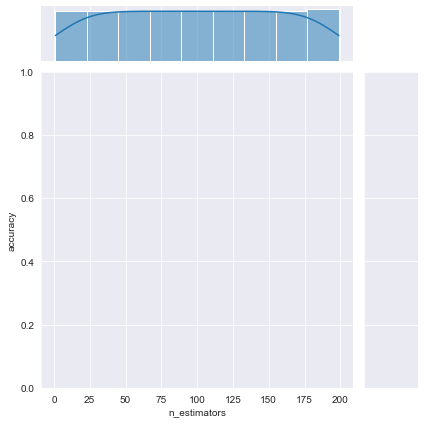

In [9]:
acc_n_esti = []
for i in tqdm.tqdm(range(1,200)):
    clf = BaggingClassifier(DecisionTreeClassifier(), max_samples=0.5, max_features=0.5, n_estimators=i)
    clf.fit(X_train, y_train)
    acc_n_esti.append([i,metrics.accuracy_score(y_test,y_pred)])

acc_n_esti = pd.DataFrame(acc_n_esti, columns=["n_estimators", "accuracy"])
sns.jointplot(x='n_estimators',y='accuracy',data=acc_n_esti,kind='reg')

5- Faites varier les parametres max_samples et max_features. Pour quelles valeurs on
obtient le meilleur résultat ? On pourra notamment utiliser GridSearchCV pour réaliser
une recherche systématique.

In [10]:
# Création du classifier
clf_para = {'estimator':[DecisionTreeClassifier()],'max_samples':np.arange(0,1,0.05),'max_features':np.arange(0,1,0.05), 'n_estimators':[200]}
clf = GridSearchCV(BaggingClassifier(), clf_para, cv=5)
clf.fit(X_train, pd.Series.ravel(y_train))
print(clf.best_params_)

AttributeError: 'numpy.ndarray' object has no attribute '_values'